## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import tensorflow.keras as keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======

50000/50000 [==============================] - 2s 36us/sample - loss: 2.4626 - accuracy: 0.0983 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 2s 36us/sample - loss: 2.4626 - accuracy: 0.0985 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 2s 36us/sample - loss: 2.4626 - accuracy: 0.0985 - val_loss: 2.4624 - val_accuracy: 0.1000
Experiment with Regulizer = 0.000100
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________

50000/50000 [==============================] - 2s 35us/sample - loss: 2.8268 - accuracy: 0.6211 - val_loss: 3.1297 - val_accuracy: 0.5101
Epoch 46/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.7857 - accuracy: 0.6219 - val_loss: 3.0406 - val_accuracy: 0.5232
Epoch 47/50
50000/50000 [==============================] - 2s 36us/sample - loss: 2.7484 - accuracy: 0.6228 - val_loss: 2.9925 - val_accuracy: 0.5294
Epoch 48/50
50000/50000 [==============================] - 2s 36us/sample - loss: 2.7061 - accuracy: 0.6278 - val_loss: 3.0065 - val_accuracy: 0.5138
Epoch 49/50
50000/50000 [==============================] - 2s 35us/sample - loss: 2.6661 - accuracy: 0.6300 - val_loss: 2.9262 - val_accuracy: 0.5326
Epoch 50/50
50000/50000 [==============================] - 2s 36us/sample - loss: 2.6342 - accuracy: 0.6305 - val_loss: 3.1184 - val_accuracy: 0.4882
Experiment with Regulizer = 0.000000
Model: "model"
____________________________________________________________

50000/50000 [==============================] - 2s 37us/sample - loss: 0.9661 - accuracy: 0.6606 - val_loss: 1.3637 - val_accuracy: 0.5240
Epoch 43/50
50000/50000 [==============================] - 2s 36us/sample - loss: 0.9538 - accuracy: 0.6634 - val_loss: 1.3476 - val_accuracy: 0.5334
Epoch 44/50
50000/50000 [==============================] - 2s 36us/sample - loss: 0.9389 - accuracy: 0.6712 - val_loss: 1.4045 - val_accuracy: 0.5218
Epoch 45/50
50000/50000 [==============================] - 2s 36us/sample - loss: 0.9305 - accuracy: 0.6740 - val_loss: 1.4510 - val_accuracy: 0.5134
Epoch 46/50
50000/50000 [==============================] - 2s 37us/sample - loss: 0.9182 - accuracy: 0.6789 - val_loss: 1.5086 - val_accuracy: 0.4961
Epoch 47/50
50000/50000 [==============================] - 2s 36us/sample - loss: 0.9092 - accuracy: 0.6812 - val_loss: 1.3668 - val_accuracy: 0.5349
Epoch 48/50
50000/50000 [==============================] - 2s 36us/sample - loss: 0.8925 - accuracy: 0.6881 - va

50000/50000 [==============================] - 2s 37us/sample - loss: 1.0019 - accuracy: 0.6481 - val_loss: 1.3751 - val_accuracy: 0.5220
Epoch 40/50
50000/50000 [==============================] - 2s 37us/sample - loss: 0.9875 - accuracy: 0.6522 - val_loss: 1.3872 - val_accuracy: 0.5204
Epoch 41/50
50000/50000 [==============================] - 2s 35us/sample - loss: 0.9752 - accuracy: 0.6571 - val_loss: 1.3888 - val_accuracy: 0.5219
Epoch 42/50
50000/50000 [==============================] - 2s 36us/sample - loss: 0.9631 - accuracy: 0.6631 - val_loss: 1.4039 - val_accuracy: 0.5194
Epoch 43/50
50000/50000 [==============================] - 2s 37us/sample - loss: 0.9521 - accuracy: 0.6634 - val_loss: 1.4129 - val_accuracy: 0.5150
Epoch 44/50
50000/50000 [==============================] - 2s 36us/sample - loss: 0.9344 - accuracy: 0.6718 - val_loss: 1.4408 - val_accuracy: 0.5101
Epoch 45/50
50000/50000 [==============================] - 2s 36us/sample - loss: 0.9282 - accuracy: 0.6727 - va

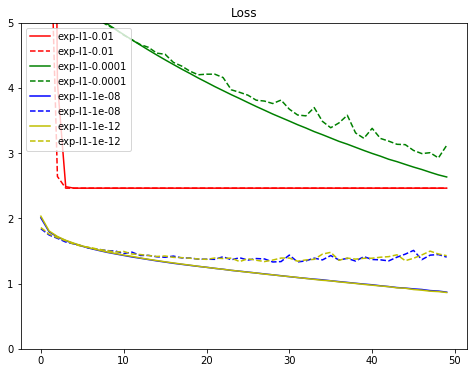

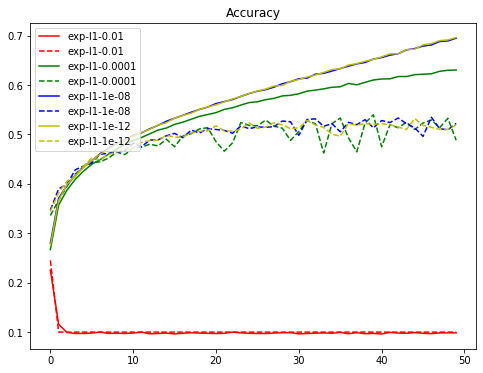

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 l1_l2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
l1_l2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in l1_l2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1_l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======

50000/50000 [==============================] - 2s 36us/sample - loss: 2.4616 - accuracy: 0.0995 - val_loss: 2.4615 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.4616 - accuracy: 0.0986 - val_loss: 2.4614 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.4615 - accuracy: 0.0986 - val_loss: 2.4615 - val_accuracy: 0.1000
Experiment with Regulizer = 0.000100
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________

50000/50000 [==============================] - 2s 30us/sample - loss: 2.0646 - accuracy: 0.5337 - val_loss: 2.2644 - val_accuracy: 0.4648
Epoch 46/50
50000/50000 [==============================] - 1s 30us/sample - loss: 2.0651 - accuracy: 0.5307 - val_loss: 2.2158 - val_accuracy: 0.4777
Epoch 47/50
50000/50000 [==============================] - 1s 29us/sample - loss: 2.0488 - accuracy: 0.5372 - val_loss: 2.1435 - val_accuracy: 0.5051
Epoch 48/50
50000/50000 [==============================] - 2s 30us/sample - loss: 2.0439 - accuracy: 0.5358 - val_loss: 2.1757 - val_accuracy: 0.4859
Epoch 49/50
50000/50000 [==============================] - 1s 30us/sample - loss: 2.0353 - accuracy: 0.5370 - val_loss: 2.1371 - val_accuracy: 0.5010
Epoch 50/50
50000/50000 [==============================] - 1s 30us/sample - loss: 2.0246 - accuracy: 0.5372 - val_loss: 2.0926 - val_accuracy: 0.5066
Experiment with Regulizer = 0.000000
Model: "model"
____________________________________________________________

50000/50000 [==============================] - 2s 37us/sample - loss: 1.3441 - accuracy: 0.5793 - val_loss: 1.6639 - val_accuracy: 0.4757
Epoch 43/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.3458 - accuracy: 0.5785 - val_loss: 1.6574 - val_accuracy: 0.4933
Epoch 44/50
50000/50000 [==============================] - 2s 35us/sample - loss: 1.3385 - accuracy: 0.5816 - val_loss: 1.5751 - val_accuracy: 0.5042
Epoch 45/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.3286 - accuracy: 0.5836 - val_loss: 1.5615 - val_accuracy: 0.4991
Epoch 46/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.3414 - accuracy: 0.5790 - val_loss: 1.5561 - val_accuracy: 0.5010
Epoch 47/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.3360 - accuracy: 0.5817 - val_loss: 1.5171 - val_accuracy: 0.5145
Epoch 48/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.3236 - accuracy: 0.5887 - va

50000/50000 [==============================] - 2s 34us/sample - loss: 1.3616 - accuracy: 0.5746 - val_loss: 1.6268 - val_accuracy: 0.4796
Epoch 40/50
50000/50000 [==============================] - 2s 33us/sample - loss: 1.3677 - accuracy: 0.5708 - val_loss: 1.5421 - val_accuracy: 0.5150
Epoch 41/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.3635 - accuracy: 0.5728 - val_loss: 1.5060 - val_accuracy: 0.5214
Epoch 42/50
50000/50000 [==============================] - 2s 35us/sample - loss: 1.3475 - accuracy: 0.5791 - val_loss: 1.5145 - val_accuracy: 0.5092
Epoch 43/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.3391 - accuracy: 0.5806 - val_loss: 1.4994 - val_accuracy: 0.5220
Epoch 44/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.3391 - accuracy: 0.5814 - val_loss: 1.5868 - val_accuracy: 0.4886
Epoch 45/50
50000/50000 [==============================] - 2s 30us/sample - loss: 1.3436 - accuracy: 0.5814 - va

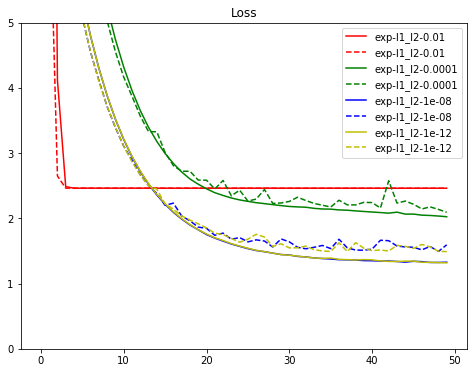

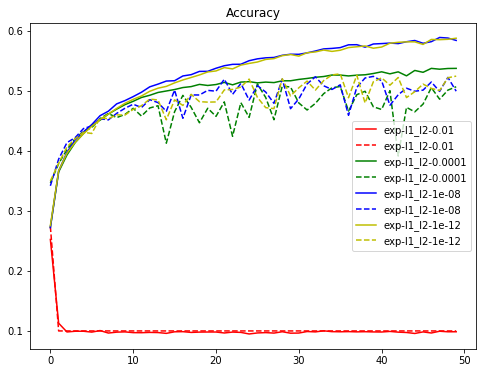

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()